# **4주차 - 1, 2** : 몬테칼로 시뮬레이션, 메트로폴리스 규칙

# Q1. 메트로폴리스 원리로 중요도 추출

**(a)** 아래 방법으로 $N = 10^5$의 난수 $x_1, \cdots, x_N$ 를 추출하라.
  1. 구간 $I = (0, 1)$에서 초기 난수 $x_1$을 뽑고 현재 위치 $x$를 $x = x_1$이라 한다.
  2. 현재 위치가 $x = x_i$일 때, $i+1$번째 후보를 구간 $I$에서 랜덤하게 뽑아 $x'$라고 한다.
  > $P_{x \to x'} = \begin{cases}
  1 & \mbox{for } x' < x
  \\
  \frac{1/\sqrt{x'}}{1/\sqrt{x}} = \sqrt{\frac{x}{x'}} & \mbox{otherwise}
  \end{cases}$

  $P_{x \to x'}$로 $x'$이 되고 $1 - P_{x \to x'}$의 확률로 현재 위치를 유지한다. 즉, 확률 $P_{x \to x'}$로 $x_{i+1} = x'$이고 확률 $1 - P_{x \to x'}$로 $x_{i+1} = x_i$이다.

처음 100개의 $i$에 대하여 $(i,x_i)$ 의 scatter plot 구하기

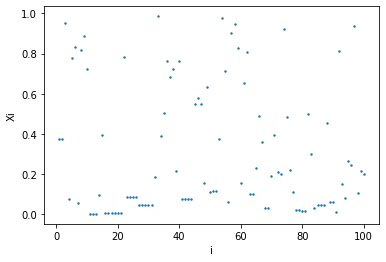

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(112)

# 난수 x 추출
x = np.random.rand(100000)

for i in range(99999):
  if x[i+1] < x[i]:
    continue
  else:
    Px = np.sqrt(x[i]/x[i+1])
    if np.random.rand() < Px :
      continue
    else:
      x[i+1]=x[i]

scatterx = [x[i] for i in range(100)]
ilist = [i+1 for i in range(100)]

plt.scatter(ilist,scatterx,s=2)
plt.xlabel('i')
plt.ylabel('Xi')
plt.show()

**(b)** 추출한 난수 $x_i (i = 1, \cdots , N)$의 분포를 확인해보자. 구간 $I$를 $M = 50$개의 균등한 소구간으로 나누고, 각각의 소구간에 들어간 난수의 갯수 $N_n (n = 1, \cdots, N)$을 그래프로 나타내고 추출된 난수의 분포가 $p(x) = \frac{1}{2\sqrt{x}}$를 따르는지 확인하여라.


**(c)** 추출한 난수의 평균과 분산을 구하고, (b)의 $p(x)$를 이용하여 계산한 결과와 비교하라.

[13185.  6160.  4605.  3728.  3151.  3101.  2674.  2597.  2526.  2369.
  2325.  2024.  2091.  2000.  1854.  1862.  1776.  1701.  1719.  1656.
  1630.  1500.  1522.  1430.  1418.  1376.  1342.  1345.  1353.  1309.
  1279.  1291.  1293.  1250.  1198.  1211.  1159.  1160.  1126.  1119.
  1140.  1110.  1123.  1053.  1094.  1037.   996.   983.  1031.  1018.]


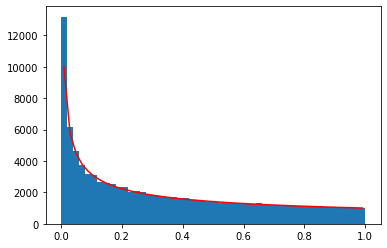

평균 : 0.3358172052568373
분산 : 0.08822969259258699
p(x)를 이용한 평균 계산 결과 : 0.3333333333333333
p(x)를 이용한 분산 계산 결과 : 0.08888888888888889


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(112)
# 난수 x 추출
x = np.random.rand(100000)

for i in range(99999):
  if x[i+1] < x[i]:
    continue
  else:
    Px = np.sqrt(x[i]/x[i+1])
    if np.random.rand() < Px :
      continue
    else:
      x[i+1]=x[i]

# 난수 x 분포 확인
section = np.zeros(50)  # 0 ~ 1사이의 bin 50개
for i in range(100000):
  section[int(x[i]*50)]+=1
print(section)

# 그래프
xlist = np.arange(1,51)*0.02-0.01         ### bin의 대표값 = 중앙값
p_x = 2000/(2*xlist**(1/2))  # C=2000
plt.bar(xlist,section,width=0.02)
plt.plot(xlist, p_x, c='red')
plt.show()

print('평균 :',np.mean(x))
print('분산 :',np.var(x))

print('p(x)를 이용한 평균 계산 결과 :',1/3)
print('p(x)를 이용한 분산 계산 결과 :',4/45)


**(d)** 추출된 난수를 이용하여 $I =$ $\int\limits_0^1$$\frac{1}{\sqrt{x}(e^x+1)}dx$ 계산하기

※ 참값 : 0.8389...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(112)
# 난수 x 추출
x = np.random.rand(100000)

for i in range(99999):
  if x[i+1] < x[i]:
    continue
  else:
    Px = np.sqrt(x[i]/x[i+1])
    if np.random.rand() < Px :
      continue
    else:
      x[i+1]=x[i]

g = 1/(np.exp(x)+1)
g_mean_w = np.mean(g)
print(2*g_mean_w)

0.8377096294109544




---



# Q2. 질량 $m$인 단원자 이상 기체 분자 100개가 길이 L인 상자 안에 있다.

$|n_x, n_y, n_z>$ 상태에 있는 입자 하나의 에너지는 다음과 같이 주어진다.
> $E(n_x, n_y, n_z) = \frac{\pi^2 \hbar^2}{2mL^2}(n_x^2, n_y^2, n_z^2) = (n_x^2+n_y^2+n_z^2)  E_0$

초기에 $N$개의 입자는 모두 바닥 상태인 $n_x = n_y = n_z = 1$인 상태에 있어 계의 초기 에너지는 $E = 3NE_0$이다. 이 상자를 $T = 10E_0/k_B$인 환경에 놓았다. 양자수가 하나 차이 나는 상태로만 전이$(n_i → n_i \pm 1)$가 가능하다고 가정하자.

**(a)** 계의 에너지의 시간이 지남에 따른 변화 그래프 $( t = 0 \sim 100 )$

1. 분자 1개의 $t = 0 \sim 100$ 까지의 시간 변화에 따른 에너지 변화 $\Rightarrow$	 함수로 만들기
2. 만들어 놓은 함수로 분자 100개의 시간 변화에 따른 에너지 변화 나타내기
3. 에너지 값들 정리하고, 그래프 그리기

[300, 528, 721, 883, 973, 1089, 1152, 1206, 1270, 1299, 1335, 1418, 1562, 1613, 1659, 1686, 1689, 1721, 1749, 1795, 1814, 1794, 1838, 1870, 1868, 1854, 1891, 1935, 1950, 1992, 1959, 1907, 1947, 1965, 1882, 1946, 1877, 1956, 1982, 1967, 1941, 2002, 2013, 2044, 2045, 2084, 2077, 2052, 2048, 2064, 2021, 2068, 2104, 2146, 2106, 2117, 2176, 2136, 2199, 2118, 2095, 2040, 2139, 2208, 2249, 2257, 2184, 2137, 2091, 2128, 2056, 2098, 2099, 2142, 2070, 2083, 2051, 2009, 2035, 2014, 2063, 2065, 2139, 2112, 2222, 2170, 2190, 2196, 2165, 2115, 2258, 2234, 2236, 2165, 2190, 2249, 2228, 2292, 2331, 2329, 2355]


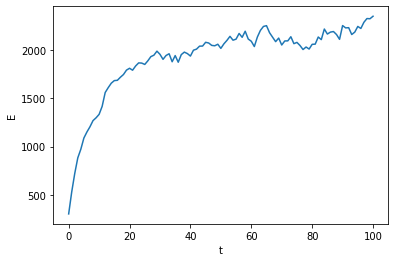

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Et = [[] for t in range(101)]  ## 시간 t = 0 ~ 100
for k in range(100):
  Et[0].append(3)  ## t = 0에서 100개의 초기 (nx^2 + ny^2 + nz^2)

# 분자 1개의 상태 변화(0~100) 만들기
def molecule1():
  statex = [1,1,1]
  # 분자 1개의 시간 t = 0 ~ 100일 때 상태 & 에너지
  for t in range(100):
    pxyz = np.random.rand()
    if pxyz < 1/3 :
      xyz = 0  ## n_x
    elif pxyz < 2/3 :
      xyz = 1  ## n_y
    else:
      xyz = 2 ## n_z

    statey = [statex[0],statex[1],statex[2]]
    ppm = np.random.rand()
    if (ppm < 1/2) or (statex[xyz] == 1):
      statey[xyz] += 1
    else:
      statey[xyz] -= 1

    prob = np.random.rand()
    Ex = np.sum(np.square(statex))
    Ey = np.sum(np.square(statey))
    if Ey <= Ex:
      E = Ey  ## Ex -> Ey
      statex = [statey[0],statey[1],statey[2]]   ## (nx,ny,nz) -> (nx,ny,nz) +- 1
    else:
      if prob < np.exp((-1)*(Ey-Ex)/10):
        E = Ey  ## Ex -> Ey
        statex = [statey[0],statey[1],statey[2]]  ## (nx,ny,nz) -> (nx,ny,nz) +- 1
      else:
        E = Ex  ## Ex -> Ex
    Et[t+1].append(E)

  return()

# 100개의 분자에 대해 t = 0 ~ 100일 때의 에너지 구하기
for k in range(100):
  molecule1()

# 시간별 에너지의 합 구하기
Etot=[]
for i in range(101):
  Etot.append(np.sum(Et[i]))

print(Etot)

# t = 0 ~ 100까지 그래프 그려보기
time = [t for t in range(101)]  # 시간은 0 ~ 100
plt.plot(time,Etot)
plt.xlabel('t')
plt.ylabel('E')
plt.show()

**(b)** 충분히 시간이 지난 후 $( t = \sim 1000 )$, 입자의 에너지 분포 그래프

[300, 5187, 6875, 8336, 9416, 10449, 11117, 11940, 12633, 13364, 13914, 14433, 14830, 15177, 15471, 15815, 16290, 16567, 16684, 17082, 17321, 17671, 17875, 18227, 18618, 18864, 19147, 19341, 19491, 19510, 19283, 19574, 19721, 20035, 20166, 20098, 20417, 20472, 20345, 20667, 20803, 21019, 21282, 21262, 21442, 21670, 21730, 21747, 21512, 21334, 21243, 21411, 21307, 21314, 21621, 21526, 21324, 21344, 21088, 21379, 21367, 21127, 21011, 21189, 21078, 21298, 21471, 21533, 21365, 21228, 21375, 21562, 21666, 21542, 21408, 21402, 21367, 21270, 21050, 21224, 21323, 21508, 21693, 21632, 21518, 21655, 21813, 21951, 22484, 22335, 22432, 22464, 22335, 22235, 22200, 21956, 22137, 22233, 22372, 22275, 22249, 22280, 22107, 21972, 22085, 22095, 21961, 21957, 21996, 21955, 22005, 21783, 21830, 21823, 22085, 21837, 21877, 21499, 21442, 21314, 21293, 21355, 21324, 21334, 21317, 21395, 21488, 21753, 21675, 21600, 21616, 21524, 21451, 21462, 21449, 21692, 21698, 21876, 21963, 21788, 21674, 21636, 21511, 2143

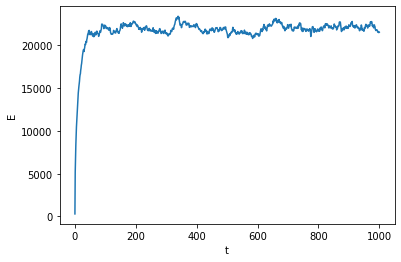

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Et = [[] for t in range(1001)]  ## 시간 t = 0 ~ 1000
for k in range(100):
  Et[0].append(3)  ## t = 0에서 100개의 초기 (nx^2 + ny^2 + nz^2)

# 분자 1개의 상태 변화(0~1000) 만들기
def molecule1():
  statex = [1,1,1]
  # 분자 1개의 시간 t = 0 ~ 1000일 때 상태 & 에너지
  for t in range(1000):
    pxyz = np.random.rand()
    if pxyz < 1/3 :
      xyz = 0  ## n_x
    elif pxyz < 2/3 :
      xyz = 1  ## n_y
    else:
      xyz = 2 ## n_z

    statey = [statex[0],statex[1],statex[2]]
    ppm = np.random.rand()
    if (ppm < 1/2) or (statex[xyz] == 1):
      statey[xyz] += 1
    else:
      statey[xyz] -= 1

    prob = np.random.rand()
    Ex = np.sum(np.square(statex))
    Ey = np.sum(np.square(statey))
    if Ey <= Ex:
      E = Ey  ## Ex -> Ey
      statex = [statey[0],statey[1],statey[2]]   ## (nx,ny,nz) -> (nx,ny,nz) +- 1
    else:
      if prob < np.exp((-1)*(Ey-Ex)/10):
        E = Ey  ## Ex -> Ey
        statex = [statey[0],statey[1],statey[2]]  ## (nx,ny,nz) -> (nx,ny,nz) +- 1
      else:
        E = Ex  ## Ex -> Ex
    Et[t+1].append(E)

  return()

# 100개의 분자에 대해 t = 0 ~ 1000일 때의 에너지 구하기
for k in range(1000):
  molecule1()

# 시간별 에너지의 합 구하기
Etot=[]
for i in range(1001):
  Etot.append(np.sum(Et[i]))

print(Etot)

# t = 0 ~ 1000까지 그래프 그려보기
time = [t for t in range(1001)]  # 시간은 0 ~ 1000
plt.plot(time,Etot)
plt.xlabel('t')
plt.ylabel('E')
plt.show()

******* 분자 1000개일 때도 해보기 ! *******
1. 분자 N = 1000, 시간 t = 0 ~ 100
2. 분자 N = 1000, 시간 t = 0 ~ 1000

[3000, 5253, 7046, 8412, 9351, 10208, 10927, 11683, 12357, 12830, 13328, 13904, 14053, 14649, 15133, 15440, 16008, 16296, 16691, 17039, 17289, 17394, 17495, 17826, 17911, 18199, 18291, 18694, 18941, 19151, 19229, 19318, 19608, 19805, 19825, 19907, 20151, 20027, 20182, 20066, 20114, 20370, 20523, 20682, 20734, 20711, 20609, 20632, 20699, 20556, 20552, 20808, 20801, 20796, 20698, 20721, 20941, 20872, 21136, 21217, 21366, 21518, 21537, 21737, 21612, 21564, 21691, 21400, 20951, 20935, 20922, 21022, 20861, 20957, 20935, 20917, 20955, 20916, 20970, 20961, 20877, 20874, 20858, 21073, 21112, 21129, 21224, 21162, 21072, 20971, 20853, 20870, 20881, 20723, 20856, 21059, 21296, 21286, 21341, 21622, 21606]


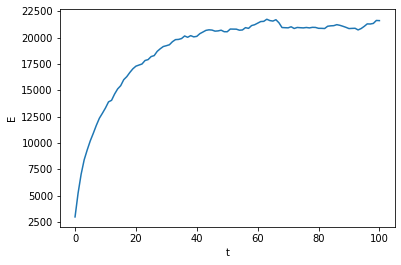

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Et = [[] for t in range(101)]  ## 시간 t = 0 ~ 100
for k in range(1000):
  Et[0].append(3)  ## t = 0에서 1000개의 초기 (nx^2 + ny^2 + nz^2)

# 분자 1개의 상태 변화(0~100) 만들기
def molecule1():
  statex = [1,1,1]
  # 분자 1개의 시간 t = 0 ~ 100일 때 상태 & 에너지
  for t in range(100):
    pxyz = np.random.rand()
    if pxyz < 1/3 :
      xyz = 0  ## n_x
    elif pxyz < 2/3 :
      xyz = 1  ## n_y
    else:
      xyz = 2 ## n_z

    statey = [statex[0],statex[1],statex[2]]
    ppm = np.random.rand()
    if (ppm < 1/2) or (statex[xyz] == 1):
      statey[xyz] += 1
    else:
      statey[xyz] -= 1

    prob = np.random.rand()
    Ex = np.sum(np.square(statex))
    Ey = np.sum(np.square(statey))
    if Ey <= Ex:
      E = Ey  ## Ex -> Ey
      statex = [statey[0],statey[1],statey[2]]   ## (nx,ny,nz) -> (nx,ny,nz) +- 1
    else:
      if prob < np.exp((-1)*(Ey-Ex)/10):
        E = Ey  ## Ex -> Ey
        statex = [statey[0],statey[1],statey[2]]  ## (nx,ny,nz) -> (nx,ny,nz) +- 1
      else:
        E = Ex  ## Ex -> Ex
    Et[t+1].append(E)

  return()

# 1000개의 분자에 대해 t = 0 ~ 100일 때의 에너지 구하기
for k in range(1000):
  molecule1()

# 시간별 에너지의 합 구하기
Etot=[]
for i in range(101):
  Etot.append(np.sum(Et[i]))

print(Etot)

# t = 0 ~ 100까지 그래프 그려보기
time = [t for t in range(101)]  # 시간은 0 ~ 100
plt.plot(time,Etot)
plt.xlabel('t')
plt.ylabel('E')
plt.show()

[3000, 5229, 6871, 8259, 9227, 10189, 11240, 11953, 12471, 13253, 13721, 14093, 14717, 15171, 15550, 15894, 16328, 16530, 17041, 17127, 17491, 17602, 17832, 18355, 18367, 18611, 18767, 18990, 19002, 19497, 19948, 20011, 20139, 20183, 20066, 20157, 20189, 20202, 20169, 20090, 20308, 20199, 20368, 20446, 20532, 20566, 20497, 20533, 20634, 20835, 20848, 20556, 20250, 20177, 20171, 20490, 20627, 20523, 20479, 20357, 20397, 20509, 20538, 20542, 20650, 20454, 20847, 20879, 20731, 20833, 20807, 20870, 20930, 20819, 20801, 20719, 20900, 20845, 20836, 20889, 21042, 21272, 21180, 21167, 21200, 21128, 21081, 21256, 21202, 21076, 21067, 21125, 21222, 21311, 21225, 21211, 21381, 21383, 21223, 21278, 21480, 21396, 21636, 21650, 21565, 21337, 21237, 21414, 21454, 21546, 21667, 21783, 21859, 21709, 21783, 21845, 21856, 21955, 21998, 21762, 21865, 21876, 21930, 21906, 21771, 21958, 21922, 21920, 21875, 21970, 22018, 22003, 21897, 22104, 22158, 22340, 22658, 22435, 22222, 22519, 22792, 22764, 22831, 227

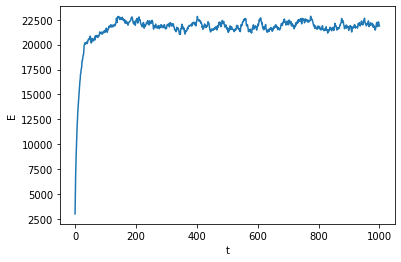

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Et = [[] for t in range(1001)]  ## 시간 t = 0 ~ 1000
for k in range(1000):
  Et[0].append(3)  ## t = 0에서 1000개의 초기 (nx^2 + ny^2 + nz^2)

# 분자 1개의 상태 변화(0~1000) 만들기
def molecule1():
  statex = [1,1,1]
  # 분자 1개의 시간 t = 0 ~ 1000일 때 상태 & 에너지
  for t in range(1000):
    pxyz = np.random.rand()
    if pxyz < 1/3 :
      xyz = 0  ## n_x
    elif pxyz < 2/3 :
      xyz = 1  ## n_y
    else:
      xyz = 2 ## n_z

    statey = [statex[0],statex[1],statex[2]]
    ppm = np.random.rand()
    if (ppm < 1/2) or (statex[xyz] == 1):
      statey[xyz] += 1
    else:
      statey[xyz] -= 1

    prob = np.random.rand()
    Ex = np.sum(np.square(statex))
    Ey = np.sum(np.square(statey))
    if Ey <= Ex:
      E = Ey  ## Ex -> Ey
      statex = [statey[0],statey[1],statey[2]]   ## (nx,ny,nz) -> (nx,ny,nz) +- 1
    else:
      if prob < np.exp((-1)*(Ey-Ex)/10):
        E = Ey  ## Ex -> Ey
        statex = [statey[0],statey[1],statey[2]]  ## (nx,ny,nz) -> (nx,ny,nz) +- 1
      else:
        E = Ex  ## Ex -> Ex
    Et[t+1].append(E)

  return()

# 1000개의 분자에 대해 t = 0 ~ 1000일 때의 에너지 구하기
for k in range(1000):
  molecule1()

# 시간별 에너지의 합 구하기
Etot=[]
for i in range(1001):
  Etot.append(np.sum(Et[i]))

print(Etot)

# t = 0 ~ 1000까지 그래프 그려보기
time = [t for t in range(1001)]  # 시간은 0 ~ 1000
plt.plot(time,Etot)
plt.xlabel('t')
plt.ylabel('E')
plt.show()